# M132A HW2 (coding questions)
## William Mahnke 

In [2]:
# installing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

7.3 $f(x) = 8e^{1-x} + 7\text{log}(x)$

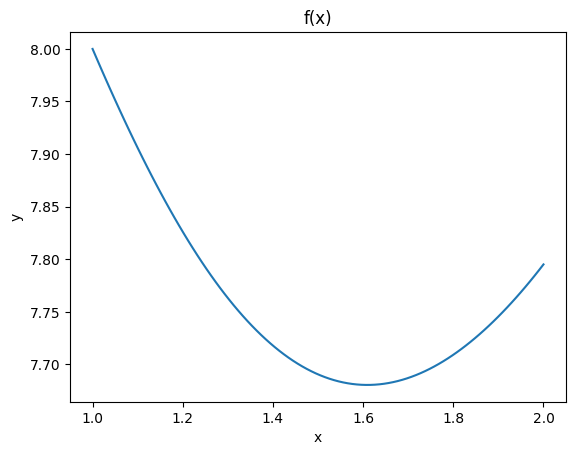

In [2]:
# part a - plot f(x) over [1,2] to verify it's unimodal 
x = np.linspace(1,2,100)
f = lambda x: 8 * np.exp(1-x) + 7 * np.log(x)

fx = f(x)

plt.plot(x, fx)
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x)')
plt.show()

From the graph shown above, it's clear to see f is unimodal.

b)

In [3]:
def golden_search(f, a0, b0, w):
    '''
    Function performs the golden search method to find a minimizer
    Note the function should be unimodal over the specified interval. 
    Inputs:
    f - function (should be unimodal over the given interval)
    a0, b0 - start interval where a0 < b0
    w - uncertainty value (how small the interval should get before stopping)
    Outputs:
    x - minimizer
    df - dataframe containing values for each iteration
    '''
    # initialize starting interval and rho value for golden search
    a, b = a0, b0
    rho = (3 - np.sqrt(5))/2
    iter = 0
    
    # create dataframe to store all information
    df = pd.DataFrame(columns = ['Iteration','rho_k','a_k','b_k',
                             'f(a_k)','f(b_k)','New interval'])
    
    # golden search loop
    while b - a > w:
        iter += 1
        new_a = a + rho * (b-a)
        new_b = b - rho * (b-a)
        fa = f(new_a)
        fb = f(new_b)
        if fa < fb:
            b = new_b
        else:
            a = new_a 
        new_int = f'[{a},{b}]'
        df.loc[iter] = [iter, rho, new_a, new_b, fa, fb, new_int]

    # calculate minimizer using the midpoint of the final interval 
    x = (a + b) / 2
    df.set_index('Iteration')
    '''
    To maybe add: last row of df for average in the last step
    iter += 1
    df.loc[iter] = [iter, 1/2, a + 1/2, b - 1/2, f(x), f(x), None]
    '''
    return x, df

In [4]:
# applying the function to problem in question and extracting results
res = golden_search(f, 1, 2, 0.23)
min = res[0]
df = res[1]

In [5]:
# displaying extracted results
print(f'Minimizer for f on [1,2]: {min}')
df

Minimizer for f on [1,2]: 1.600813061875578


,Iteration,rho_k,a_k,b_k,f(a_k),f(b_k),New interval
1,1,0.381966,1.381966,1.618034,7.724696,7.680507,"[1.381966011250105,2]"
2,2,0.381966,1.618034,1.763932,7.680507,7.699467,"[1.381966011250105,1.7639320225002102]"
3,3,0.381966,1.527864,1.618034,7.686003,7.680507,"[1.5278640450004204,1.7639320225002102]"
4,4,0.381966,1.618034,1.673762,7.680507,7.683814,"[1.5278640450004204,1.673762078750736]"


c)

In [34]:
def fibonacci_numbers(N):
    '''
    Creates the first N+1 fibonacci numbers
    Input: N - desired number of entries
    Output: list = list of values
    '''
    # list starts with F_0 = 1 and F_1 = 1
    # (note F_{-1} = 0, but isn't needed for calculations)
    list = [1,1]
    for i in range(2,N+2):
        list.append(list[i-1] + list[i-2])
    list.pop(0)
    return list

In [7]:
def fibonacci_search(f, a0, b0, ep, N):
    '''
    Performs a fibonacci search for a function f to find its 
    minimum in a given starting interval. Note the function should be
    unimodal over the starting interval to ensure the process works 
    Inputs:
    f - function
    a0, b0 - values for starting interval where a0 < b0
    ep - epsilon value for final rho value 
    N - number of iterations
    Outputs:
    x - minimizer 
    df - dataframe for intermediate data 
    '''
    # initialize values for loop
    a, b = a0, b0
    vals = fibonacci_numbers(N)
    iter = 0
    
    # create dataframe to store all information
    df = pd.DataFrame(columns = ['Iteration','rho_k','a_k','b_k',
                             'f(a_k)','f(b_k)','New interval'])
    
    # fibonacci search loop for i = 1, ..., N-1
    for i in range(1,N):
        iter += 1
        rho = 1 - (vals[-i-1]/vals[-i])
        new_a = a + rho * (b - a)
        new_b = b - rho * (b - a)
        fa = f(new_a)
        fb = f(new_b)
        if fa < fb:
            b = new_b
        else:
            a = new_a
        new_int = f'[{a},{b}]'
        df.loc[iter] = [iter, rho, new_a, new_b, fa, fb, new_int]
    
    # iteration N - subtracting ep from rho_N
    iter += 1
    rho = 1 - (vals[-N-1]/vals[-N]) - ep
    new_a = a + rho * (b - a)
    new_b = b - rho * (b - a)
    fa = f(new_a)
    fb = f(new_b)
    if fa < fb:
        b = new_b
    else:
        a = new_a
    new_int = f'[{a},{b}]'
    df.loc[iter] = [iter, rho, new_a, new_b, fa, fb, new_int]

    # using midpoint for final minimizer 
    x = (a + b) / 2
    return x, df    

In [8]:
res = fibonacci_search(f, 1, 2, 0.05, 4)
min = res[0]
df = res[1]

In [9]:
print(f'Minimizer for f on [1,2]: {min}')
df

Minimizer for f on [1,2]: 1.56875


,Iteration,rho_k,a_k,b_k,f(a_k),f(b_k),New interval
1,1,0.375000,1.3750,1.6250,7.727490,7.680646,"[1.375,2]"
2,2,0.400000,1.6250,1.7500,7.680646,7.696243,"[1.375,1.75]"
3,3,0.333333,1.5000,1.6250,7.690501,7.680646,"[1.5,1.75]"
4,4,0.450000,1.6125,1.6375,7.680454,7.681093,"[1.5,1.6375]"


7.8 a) To compute the the x-value for a subsequent step using Newton's method, we have $x^{(k+1)} = x^{(k)} - \frac{g'(x^{(k)})}{g''(x^{(k)})} \\$
Calculating the derivatives we get, $g'(x) = \frac{2e^x}{(e^x+1)^2}$. Thus we get

$\begin{align}
x^{(k+1)} &= x^{(k)} - \frac{g(x^{(k)})}{g'(x^{(k)})} \\
&= x^{(k)} - \frac{(e^{x^{(k)}}-1)(e^{x^{(k)}}+1)}{2e^{x^{(k)}}} \\
&= x^{(k)} - \left(\frac{e^{x^{(k)}}}{2} - \frac{e^{-x^{(k)}}}{2}\right) = x^{(k)} - \text{sinh}(x^{(k)})
\end{align} \\$

b) First, observe $x^{(1)} = x^{(0)} - \text{sinh}(x^{(0)})$. Then $x^{(2)} = x^{(1)} - \text{sinh}(x^{(1)}) = x^{(0)} - \text{sinh}(x^{(0)}) - \text{sinh}(x^{(0)} - \text{sinh}(x^{(0)}))$. Therefore, in order for $x^{(0)} = x^{(2)}$, we must have 

$\text{sinh}(x^{(0)}) + \text{sinh}(x^{(0)} - \text{sinh}(x^{(0)})) = 0$

c) Newton's method will converge to a root if $|g(x)g''(x)| < [g'(x)]^2$. For this function, this condition implies 

$\left|\frac{2(e^x-1)^2e^x}{(e^x+1)^4}\right| < \frac{4e^{2x}}{(e^x+1)^4} \implies e^{2x}-4e^x+1<0 \implies x \in \left(\text{ln}(2-\sqrt{3}),\text{ln}(2+\sqrt{3})\right)$ 

7.12 a) $f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^T\begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}\mathbf{x}, \ \mathbf{x}^{(0)} = [0.8,-0.25], \ \varepsilon = 0.075$

$\nabla f(\mathbf{x}) = [2x_1 + x_2, 2x_2 + x_1] \implies -\nabla f(\mathbf{x}) = [-2x_1 - x_2, -2x_2 - x_1]$

$\implies \mathbf{x}^{(0)} - \alpha\nabla f(\mathbf{x}^{(0)}) = [0.8 - 1.35\alpha, -0.25 - 0.3\alpha]$

To ensure the vectors along the line are $\varepsilon, 2\varepsilon, \dots$ from the starting point, we use $\alpha = \frac{b\varepsilon}{\sqrt{1.9125}}$ (where b is increasing powers of 2) on the line $\mathbf{x}^{(0)} - \alpha \nabla f(\mathbf{x}^{(0)})$ which represents the line starting at $x^{(0)}$ in the direction of the negative gradient. 

In [23]:
# defining function to find bracket interval
# x = x_1, y = x_2
ep = 0.075
f = lambda x,y: x**2+y**2 + x*y

fx_0 = f(0.8,-0.25)
fx_1 = f(0.8 - 1.35*(ep/np.sqrt(1.9125)), -0.25 - 0.3*(ep/np.sqrt(1.9125)))
fx_2 = f(0.8 - 1.35*(2*ep/np.sqrt(1.9125)), -0.25 - 0.3*(2*ep/np.sqrt(1.9125)))
fx_3 = f(0.8 - 1.35*(4*ep/np.sqrt(1.9125)), -0.25 - 0.3*(4*ep/np.sqrt(1.9125)))
fx_4 = f(0.8 - 1.35*(8*ep/np.sqrt(1.9125)), -0.25 - 0.3*(8*ep/np.sqrt(1.9125)))
fx_5 = f(0.8 - 1.35*(16*ep/np.sqrt(1.9125)), -0.25 - 0.3*(16*ep/np.sqrt(1.9125)))
print(fx_0)
print(fx_1)
print(fx_2)
print(fx_3)
print(fx_4)
print(fx_5)

0.5025000000000002
0.4055963013260434
0.322324955593263
0.19667932295123186
0.10897629296128719
0.5879231741578682


In [25]:
print(-0.25 - 0.3*(16*ep/np.sqrt(1.9125)))

-0.5103165493823874


From performing multiple evaluations, our interval is the straight line from [0.8,-0.25] to (approximately) [-0.371,-0.51]

In [ ]:
A = np.array([[2, 1], [1, 2]])
f = lambda x: 0.5 * x.T @ A @ x # input x is a vector of size 2

In [27]:
def multi_golden_search(f, a0, b0, w):
    ''' 
    Multi-dimensional golden search algorithm
    Inputs:
    f - multidimensional function
    a0, b0 - starting points for the interval 
    w - uncertainty value, algorithm continutes until the length of the interval is less than w
    '''
    a, b = a0, b0
    rho = (3 - np.sqrt(5))/2
    iter = 0

    df = pd.DataFrame(columns = ['Iteration','rho_k','a_k','b_k',
                             'f(a_k)','f(b_k)','New interval'])
    
    while np.linalg.norm(a - b) > w:
        iter += 1
        new_a = a + (rho/np.sqrt(1.9125)) * (b-a)
        new_b = b - (rho/np.sqrt(1.9125)) * (b-a)
        fa = f(new_a)
        fb = f(new_b)
        if fa < fb:
            b = new_b
        else:
            a = new_a
        new_int = f'[{a},{b}]'
        df.loc[iter] = [iter, rho, new_a, new_b, fa, fb, new_int]

    x = (a + b) / 2
    return x, df

In [28]:
a0 = np.array([0.8,-0.25])
b0 = np.array([-0.371,-0.51])
res = multi_golden_search(f, a0, b0, w = 0.01)
min = res[0]
df = res[1]

In [29]:
print(min)
df

[ 0.24403257 -0.37344281]


,Iteration,rho_k,a_k,b_k,f(a_k),f(b_k),New interval
1,1,0.381966,"[0.47656955919692123, -0.32181205346609776]","[-0.047569559196921185, -0.43818794653390225]",0.177316,0.215116,"[[ 0.8 -0.25],[-0.04756956 -0.43818795]]"
2,2,0.381966,"[0.5659011134565914, -0.30197754953141437]","[0.18652932734648736, -0.3862103970024879]",0.240545,0.111912,"[[ 0.56590111 -0.30197755],[-0.04756956 -0.438..."
3,3,0.381966,"[0.39646038751629525, -0.3395988891936492]","[0.121871166743375, -0.4005666068716674]",0.137871,0.126489,"[[ 0.39646039 -0.33959889],[-0.04756956 -0.438..."
4,4,0.381966,"[0.2738192249243028, -0.36682920710476624]","[0.07507160339507128, -0.41095762862278523]",0.109096,0.143671,"[[ 0.39646039 -0.33959889],[ 0.0750716 -0.410..."
5,5,0.381966,"[0.30769273925199725, -0.3593081876981048]","[0.1638392516593693, -0.39124833011832966]",0.113221,0.115817,"[[ 0.39646039 -0.33959889],[ 0.16383925 -0.391..."
6,6,0.381966,"[0.33221038195667235, -0.35386447539817695]","[0.2280892572189922, -0.37698274391380193]",0.118026,0.108155,"[[ 0.33221038 -0.35386448],[ 0.16383925 -0.391..."
7,7,0.381966,"[0.2857062411449137, -0.36418990375945554]","[0.21034339247112793, -0.38092290175705107]",0.110211,0.109222,"[[ 0.28570624 -0.3641899 ],[ 0.16383925 -0.391..."
8,8,0.381966,"[0.2520465535884203, -0.3716634466840399]","[0.19749893921586273, -0.3837747871937453]",0.107985,0.110494,"[[ 0.28570624 -0.3641899 ],[ 0.19749894 -0.383..."
9,9,0.381966,"[0.2613433662132628, -0.369599252591419]","[0.22186181414751366, -0.3783654383617818]",0.108312,0.108438,"[[ 0.28570624 -0.3641899 ],[ 0.22186181 -0.378..."
10,10,0.381966,"[0.26807239727933807, -0.36810518933165853]","[0.2394956580130893, -0.3744501527895788]",0.108685,0.107892,"[[ 0.2680724 -0.36810519],[ 0.22186181 -0.378..."


c)

In [30]:
def multi_fibonacci_search(f, a0, b0, ep, N):
    '''
    Multi dimensional fibonacci search algorithm
    Inputs:
    f - multidimensional function
    a0, b0 - starting points for the interval 
    ep - epsilon value to subtract from the final rho value
    N - number of iterations to perform 
    '''
    # initialize values for loop
    a, b = a0, b0
    vals = fibonacci_numbers(N)
    iter = 0
    
    # create dataframe to store all information
    df = pd.DataFrame(columns = ['Iteration','rho_k','a_k','b_k',
                             'f(a_k)','f(b_k)','New interval'])
    
    # fibonacci search loop for i = 1, ..., N-1
    for i in range(1,N):
        iter += 1
        rho = 1 - (vals[-i-1]/vals[-i])
        new_a = a + (rho/np.sqrt(1.9125)) * (b-a)
        new_b = b - (rho/np.sqrt(1.9125)) * (b-a)
        fa = f(new_a)
        fb = f(new_b)
        if fa < fb:
            b = new_b
        else:
            a = new_a
        new_int = f'[{a},{b}]'
        df.loc[iter] = [iter, rho, new_a, new_b, fa, fb, new_int]
    
    # iteration N - subtracting epsilon from rho_N
    iter += 1
    rho = 1 - (vals[-N-1]/vals[-N]) - ep
    new_a = a + (rho/np.sqrt(1.9125)) * (b-a)
    new_b = b - (rho/np.sqrt(1.9125)) * (b-a)
    fa = f(new_a)
    fb = f(new_b)
    if fa < fb:
        b = new_b
    else:
        a = new_a
    new_int = f'[{a},{b}]'
    df.loc[iter] = [iter, rho, new_a, new_b, fa, fb, new_int]

    # using midpoint for final minimizer 
    x = (a + b) / 2
    return x, df 

In [35]:
a0 = np.array([0.8,-0.25])
b0 = np.array([-0.371,-0.51])
res = multi_fibonacci_search(f, a0, b0, ep = 0.05, N = 15)
min = res[0]
df = res[1]

In [37]:
print(min)
df

[ 0.24379436 -0.3734957 ]


,Iteration,rho_k,a_k,b_k,f(a_k),f(b_k),New interval
1,1,0.381966,"[0.47656941071917286, -0.32181208643297615]","[-0.04756941071917281, -0.43818791356702386]",0.177316,0.215116,"[[ 0.8 -0.25],[-0.04756941 -0.43818791]]"
2,2,0.381966,"[0.5659014358215119, -0.301977477955941]","[0.1865291534593154, -0.3862104356110828]",0.240545,0.111912,"[[ 0.56590144 -0.30197748],[-0.04756941 -0.438..."
3,3,0.381967,"[0.39646012870433517, -0.33959894665830304]","[0.12187189639800389, -0.4005664448646618]",0.137871,0.126488,"[[ 0.39646013 -0.33959895],[-0.04756941 -0.438..."
4,4,0.381963,"[0.2738200888883369, -0.36682901527671424]","[0.07507062909682544, -0.41095784494861265]",0.109096,0.143671,"[[ 0.39646013 -0.33959895],[ 0.07507063 -0.410..."
5,5,0.381974,"[0.3076903684092141, -0.35930871410213866]","[0.1638403893919465, -0.391248077504777]",0.113220,0.115816,"[[ 0.39646013 -0.33959895],[ 0.16384039 -0.391..."
6,6,0.381944,"[0.3322141365731289, -0.3538636417514829]","[0.22808638152315278, -0.3769833824115972]",0.118027,0.108155,"[[ 0.33221414 -0.35386364],[ 0.16384039 -0.391..."
7,7,0.382022,"[0.2857023988179857, -0.3641907568807205]","[0.2103521271470897, -0.3809209623755394]",0.110211,0.109221,"[[ 0.2857024 -0.36419076],[ 0.16384039 -0.391..."
8,8,0.381818,"[0.2520571132782685, -0.3716611020902222]","[0.1974856749316637, -0.38377773229527534]",0.107985,0.110495,"[[ 0.2857024 -0.36419076],[ 0.19748567 -0.383..."
9,9,0.382353,"[0.2613122394161246, -0.36960616375047617]","[0.2218758343335248, -0.3783623254255197]",0.108310,0.108437,"[[ 0.2857024 -0.36419076],[ 0.22187583 -0.378..."
10,10,0.380952,"[0.26812027074864464, -0.36809455986793543]","[0.23945796240286588, -0.37445852243830474]",0.108688,0.107892,"[[ 0.26812027 -0.36809456],[ 0.22187583 -0.378..."
